<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Libraries</a></span></li><li><span><a href="#Utility-Functions" data-toc-modified-id="Utility-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Utility Functions</a></span></li><li><span><a href="#Load-Data-Set" data-toc-modified-id="Load-Data-Set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Data Set</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data Pre-processing</a></span></li><li><span><a href="#USER_ID" data-toc-modified-id="USER_ID-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>USER_ID</a></span></li><li><span><a href="#UNIX_TIMESTAMP" data-toc-modified-id="UNIX_TIMESTAMP-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>UNIX_TIMESTAMP</a></span></li><li><span><a href="#RESPONSE_SIZE" data-toc-modified-id="RESPONSE_SIZE-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>RESPONSE_SIZE</a></span></li><li><span><a href="#CACHE_RESULT_CODE" data-toc-modified-id="CACHE_RESULT_CODE-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>CACHE_RESULT_CODE</a></span></li><li><span><a href="#TIME_TO_SERVER_MS" data-toc-modified-id="TIME_TO_SERVER_MS-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>TIME_TO_SERVER_MS</a></span><ul class="toc-item"><li><span><a href="#Misiing-value-imputation" data-toc-modified-id="Misiing-value-imputation-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Misiing value imputation</a></span></li></ul></li></ul></li></ul></div>

## Load Libraries ##

In [1]:
import time
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import matplotlib.cm as cm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth',999)
pd.set_option('display.max_columns', 999)
pd.set_option("display.max_rows",999)

## Utility Functions ##

In [2]:
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='coolwarm')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)
    
    

## Outliers Detection ##
# used extend instead of append because it will add the list's elements not the whole list.
from collections import Counter
def detect_outliers(df,n,features):
    """Takes a dataframe df of features and return a list of the indices corresponding to the observations 
    containing more than n outliers according to the Turkey method"""
    outlier_indices = []
    # iterate over feature(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3-Q1
        # outiler step 
        outlier_step = 1.5*IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col]< Q1 - outlier_step)|(df[col] > Q3 + outlier_step)].index
        
        #Append the found outlier indices for col to the List of outliers indices 
        # used extend instead of append because it will add the list's elements not the whole list.
        outlier_indices.extend(outlier_list_col)
        
        # select observations containing more than 2 outliers 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v > n)
        
    return multiple_outliers


## Load Data Set ##

In [10]:
train = pd.read_csv("C:/Users/sutiwari/Downloads/Cybage/video_sessions.csv")

## Exploratory Data Analysis ##

### Data Pre-processing ###

In [11]:
train.head()

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS
0,137015810,1512950417000,4106686,TCP-MISS,352.0
1,137015810,1512950418000,3864825,TCP-MISS,331.0
2,137015810,1512950435000,3871134,TCP-MISS,385.0
3,137015810,1512950437000,3607047,TCP-MISS,279.0
4,137015810,1512950453000,4019151,TCP-MISS,352.0


In [14]:
train.shape

(146074, 5)

In [12]:
train.isnull().sum()

USER_ID                0
UNIX_TIMESTAMP         0
RESPONSE_SIZE          0
CACHE_RESULT_CODE      0
TIME_TO_SERVER_MS    183
dtype: int64

Time to server ms has missing values in it

In [13]:
train.UNIX_TIMESTAMP = pd.to_datetime(train.UNIX_TIMESTAMP,unit='ms')

Convert Unix Timestamp to readable time stamp 

I can see the USer Id column has repeatition of the ID's

unique values in each column

In [17]:
train.apply(lambda x: len(x.unique().tolist()))

USER_ID                  71
UNIX_TIMESTAMP        56191
RESPONSE_SIZE        100949
CACHE_RESULT_CODE         2
TIME_TO_SERVER_MS      3362
dtype: int64

### USER_ID ###

User_ID is the entity streaming 
1. there are 71 distinct entities 

In [15]:
len(train.USER_ID.unique().tolist())

71

### UNIX_TIMESTAMP ###

In [40]:
print("Data consist of Year := ",train.UNIX_TIMESTAMP.dt.year.unique())
print("Data is pan across month := ",train.UNIX_TIMESTAMP.dt.month.unique())
print("Data is or these days := ",train.UNIX_TIMESTAMP.dt.day.unique())
print("Data is within these hours := ",train.UNIX_TIMESTAMP.dt.hour.unique())

Data consist of Year :=  [2017]
Data is pan across month :=  [12]
Data is or these days :=  [11 12]
Data is within these hours :=  [ 0 12 13 14  1  2  3  4 19 20 21 22 23 15 16  5 11  6 17  7  8  9 10 18]


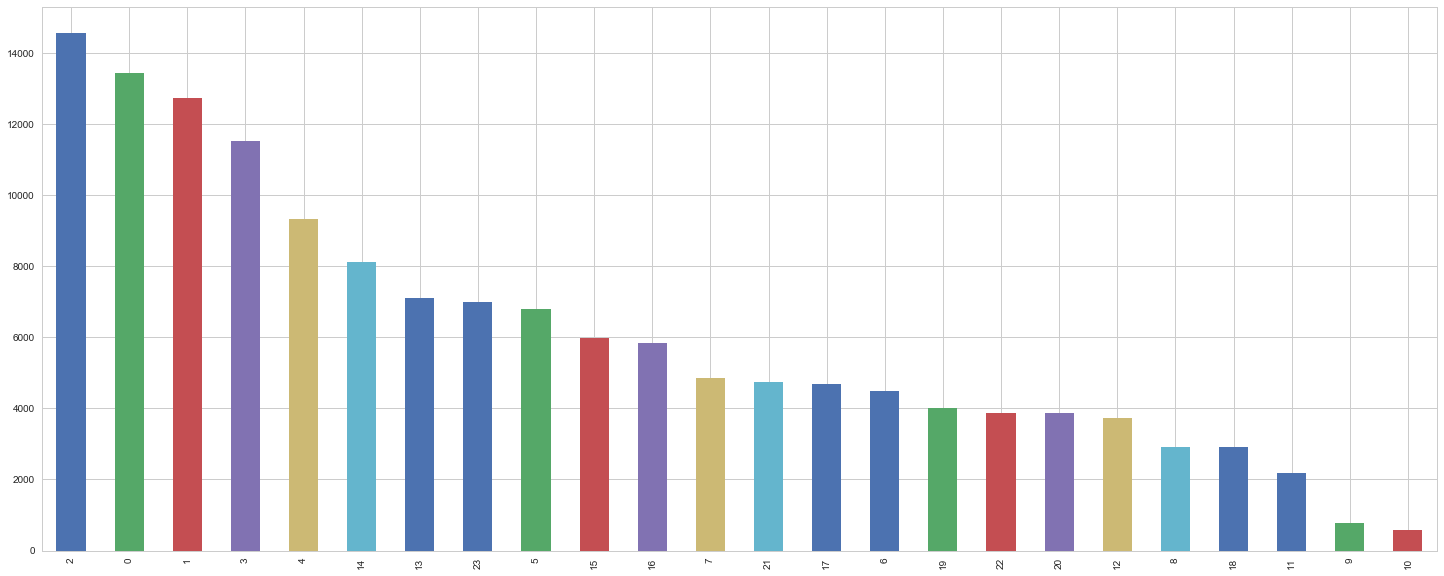

In [52]:
plt.figure(figsize=(25,10))
train.UNIX_TIMESTAMP.dt.hour.value_counts().plot(kind='bar')

I could see most of the requests are made post midnight

In [55]:
train.UNIX_TIMESTAMP.dt.hour.value_counts(normalize=True).sort_values(ascending=False)

2     0.099765
0     0.091960
1     0.087175
3     0.078844
4     0.063851
14    0.055636
13    0.048585
23    0.047805
5     0.046545
15    0.040972
16    0.040041
7     0.033243
21    0.032545
17    0.032080
6     0.030765
19    0.027466
22    0.026596
20    0.026555
12    0.025494
8     0.019983
18    0.019983
11    0.014986
9     0.005223
10    0.003902
Name: UNIX_TIMESTAMP, dtype: float64

I hypothesise that most of the CACHE_RESULT_CODE = MISS would be ouccuring during this period due to heavy traffic

In [57]:
pd.crosstab(train.UNIX_TIMESTAMP.dt.hour,train.CACHE_RESULT_CODE).sort_values('TCP-MISS',ascending=False)

CACHE_RESULT_CODE,TCP-HIT,TCP-MISS
UNIX_TIMESTAMP,,
2,2992,11581
1,2047,10687
0,3471,9962
3,1845,9672
14,1768,6359
4,3019,6308
13,1533,5564
5,1262,5537
23,1724,5259


Now, intresting thing that i could see and cannot fathom the reason for no HIT's @ few not suspicious hour of day i.e. 7,6,18,9,10

I believe the hour of day has something to offer to our reseach i will add it as a column in the data frame 

In [58]:
train['hourOfRequest'] = train.UNIX_TIMESTAMP.dt.hour

let's see if we have some pattern with the Day of week althought, we have only two days data but it could have also been quite a good feature

In [60]:
train.UNIX_TIMESTAMP.dt.day.value_counts(normalize=True)

11    0.999836
12    0.000164
Name: UNIX_TIMESTAMP, dtype: float64

it seems the data set actually have majority of data from 11th December 2017

In [62]:
print("min timestamp from 12th request := ",min(train[train.UNIX_TIMESTAMP.dt.day==12].UNIX_TIMESTAMP))
print("max timestamp from 12th request := ",max(train[train.UNIX_TIMESTAMP.dt.day==12].UNIX_TIMESTAMP))

min timestamp from 12th request :=  2017-12-12 00:00:00
max timestamp from 12th request :=  2017-12-12 00:00:06


I want to remove the records for 12th date as it won't contribute much in our clustering analysis let's analysis them first before rejecting them

In [66]:
train[(train.UNIX_TIMESTAMP.dt.day==12)]

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS,hourOfRequest
13301,137017891,2017-12-12 00:00:00,3750109,TCP-MISS,74.0,0
13302,137017891,2017-12-12 00:00:00,3815078,TCP-MISS,91.0,0
45950,2917860722,2017-12-12 00:00:05,3702626,TCP-HIT,138.0,0
45951,2917860722,2017-12-12 00:00:05,3749402,TCP-HIT,193.0,0
51739,2917872454,2017-12-12 00:00:02,3714031,TCP-HIT,26.0,0
67725,2917873537,2017-12-12 00:00:03,3717932,TCP-MISS,64.0,0
75277,2917876253,2017-12-12 00:00:04,3983691,TCP-HIT,41.0,0
75278,2917876253,2017-12-12 00:00:05,3714031,TCP-HIT,22.0,0
78778,2917876499,2017-12-12 00:00:04,3749402,TCP-MISS,61.0,0
78779,2917876499,2017-12-12 00:00:04,3702626,TCP-MISS,87.0,0


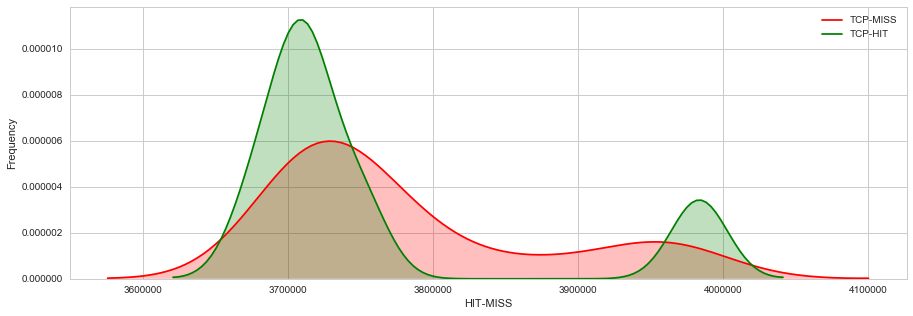

In [72]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(train["RESPONSE_SIZE"][(train["CACHE_RESULT_CODE"] == 'TCP-MISS') & (train.UNIX_TIMESTAMP.dt.day==12)], color="Red", shade = True)
g = sns.kdeplot(train["RESPONSE_SIZE"][(train["CACHE_RESULT_CODE"] == 'TCP-HIT') & (train.UNIX_TIMESTAMP.dt.day==12)], ax =g, color="green", shade= True)

g.set_xlabel("HIT-MISS")
g.set_ylabel("Frequency")
g = g.legend(["TCP-MISS","TCP-HIT"])

it means as the size of the packets increase the chances of being MISS increases but its just 24 records and we can't assume that.

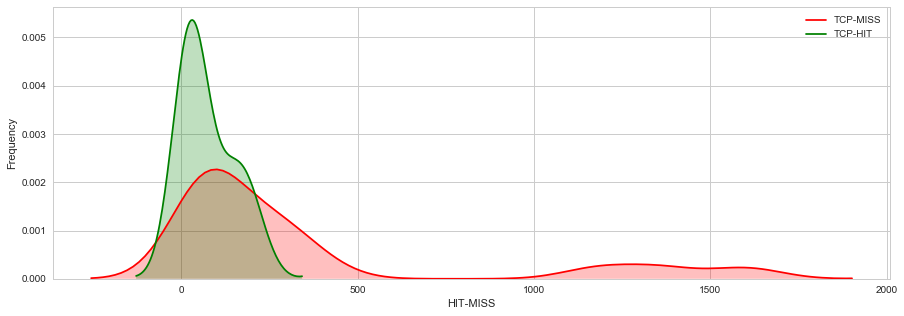

In [75]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["CACHE_RESULT_CODE"] == 'TCP-MISS') & (train.UNIX_TIMESTAMP.dt.day==12)], color="Red", shade = True)
g = sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["CACHE_RESULT_CODE"] == 'TCP-HIT') & (train.UNIX_TIMESTAMP.dt.day==12
                                                                                       )], ax =g, color="green", shade= True)

g.set_xlabel("HIT-MISS")
g.set_ylabel("Frequency")
g = g.legend(["TCP-MISS","TCP-HIT"])

Let analysis the 11th day of month.

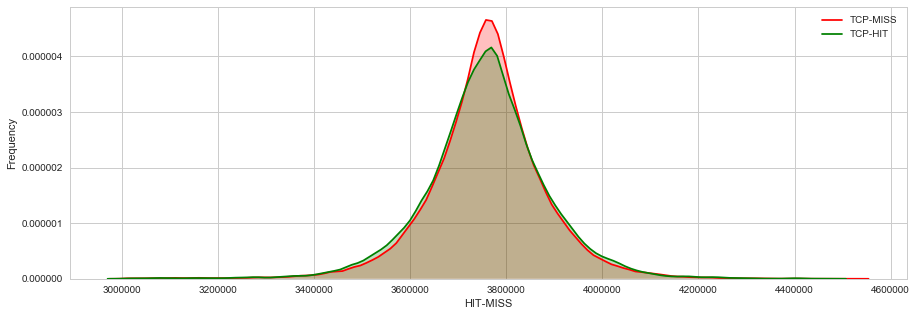

In [73]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(train["RESPONSE_SIZE"][(train["CACHE_RESULT_CODE"] == 'TCP-MISS') & (train.UNIX_TIMESTAMP.dt.day==11)], color="Red", shade = True)
g = sns.kdeplot(train["RESPONSE_SIZE"][(train["CACHE_RESULT_CODE"] == 'TCP-HIT') & (train.UNIX_TIMESTAMP.dt.day==11)], ax =g, color="green", shade= True)

g.set_xlabel("HIT-MISS")
g.set_ylabel("Frequency")
g = g.legend(["TCP-MISS","TCP-HIT"])

looking at the density plot for the 11th day of month it seems that due to such few records the pattern is showing two bumps in 12th day

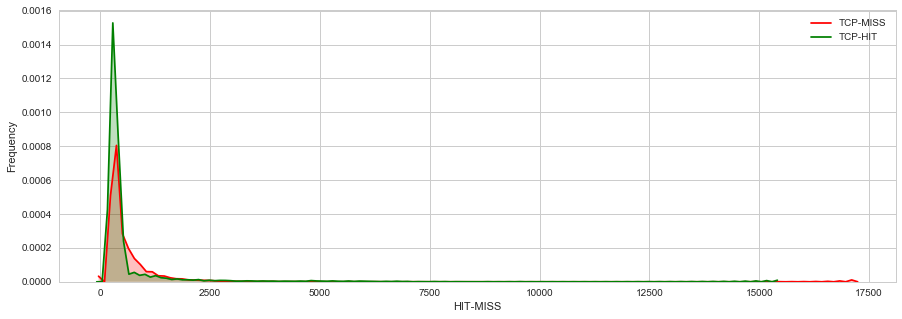

In [76]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["CACHE_RESULT_CODE"] == 'TCP-MISS') & (train.UNIX_TIMESTAMP.dt.day==11)], color="Red", shade = True)
g = sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["CACHE_RESULT_CODE"] == 'TCP-HIT') & (train.UNIX_TIMESTAMP.dt.day==11
                                                                                       )], ax =g, color="green", shade= True)

g.set_xlabel("HIT-MISS")
g.set_ylabel("Frequency")
g = g.legend(["TCP-MISS","TCP-HIT"])

Now, looking at both the days I think that 12th date data wouldn't help much in terms of a distinct representation of the pattern so i take a judgement call to drop them

In [77]:
train = train[train.UNIX_TIMESTAMP.dt.day==11]

As per Objective 2

In [79]:
train = train.sort_values(['USER_ID','UNIX_TIMESTAMP'])

In [80]:
train['sessionDiff'] = train.UNIX_TIMESTAMP.diff()

In [84]:
train.head(10)

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS,hourOfRequest,sessionDiff
0,137015810,2017-12-11 00:00:17,4106686,TCP-MISS,352.0,0,0
1,137015810,2017-12-11 00:00:18,3864825,TCP-MISS,331.0,0,0 days 00:00:01
2,137015810,2017-12-11 00:00:35,3871134,TCP-MISS,385.0,0,0 days 00:00:17
3,137015810,2017-12-11 00:00:37,3607047,TCP-MISS,279.0,0,0 days 00:00:02
4,137015810,2017-12-11 00:00:53,4019151,TCP-MISS,352.0,0,0 days 00:00:16
5,137015810,2017-12-11 12:46:34,3762661,TCP-HIT,590.0,12,0 days 12:45:41
6,137015810,2017-12-11 12:46:35,3938262,TCP-MISS,585.0,12,0 days 00:00:01
7,137015810,2017-12-11 12:46:35,3588735,TCP-MISS,562.0,12,0 days 00:00:00
8,137015810,2017-12-11 12:46:39,3655776,TCP-MISS,788.0,12,0 days 00:00:04
9,137015810,2017-12-11 12:46:43,3711227,TCP-MISS,477.0,12,0 days 00:00:04


every new user will have its first difference as NaT so converting it to 0

In [83]:
train.ix[0,'sessionDiff'] = 0.0

In [92]:
train.loc[train.index.isin(train[train.USER_ID.duplicated()==False].index.tolist()),['sessionDiff']] = 0.0

In [93]:
train[train.USER_ID.duplicated()==False]

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS,hourOfRequest,sessionDiff
0,137015810,2017-12-11 00:00:17,4106686,TCP-MISS,352.0,0,0
1335,137015815,2017-12-11 00:18:16,3580420,TCP-MISS,60.0,0,0
3754,137015856,2017-12-11 13:23:40,3806473,TCP-HIT,676.0,13,0
5597,137015916,2017-12-11 00:00:03,3640853,TCP-MISS,72.0,0,0
7311,137015982,2017-12-11 04:20:36,3803977,TCP-MISS,419.0,4,0
7454,137015993,2017-12-11 01:21:10,3725599,TCP-MISS,579.0,1,0
9158,137016210,2017-12-11 00:00:03,3985415,TCP-MISS,81.0,0,0
12355,137017891,2017-12-11 00:00:03,3609845,TCP-MISS,61.0,0,0
13303,137018146,2017-12-11 02:36:48,3758019,TCP-MISS,578.0,2,0
13888,137019219,2017-12-11 00:00:06,3694505,TCP-MISS,335.0,0,0


In [96]:
train.sessionDiff.describe()

count              146050
unique                261
top       0 days 00:00:00
freq                38021
Name: sessionDiff, dtype: object

In [97]:
train[train.sessionDiff.duplicated()==False]

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS,hourOfRequest,sessionDiff
0,137015810,2017-12-11 00:00:17,4106686,TCP-MISS,352.0,0,0
1,137015810,2017-12-11 00:00:18,3864825,TCP-MISS,331.0,0,0 days 00:00:01
2,137015810,2017-12-11 00:00:35,3871134,TCP-MISS,385.0,0,0 days 00:00:17
3,137015810,2017-12-11 00:00:37,3607047,TCP-MISS,279.0,0,0 days 00:00:02
4,137015810,2017-12-11 00:00:53,4019151,TCP-MISS,352.0,0,0 days 00:00:16
5,137015810,2017-12-11 12:46:34,3762661,TCP-HIT,590.0,12,0 days 12:45:41
7,137015810,2017-12-11 12:46:35,3588735,TCP-MISS,562.0,12,0 days 00:00:00
8,137015810,2017-12-11 12:46:39,3655776,TCP-MISS,788.0,12,0 days 00:00:04
10,137015810,2017-12-11 12:47:01,3864928,TCP-HIT,508.0,12,0 days 00:00:18
27,137015810,2017-12-11 12:48:38,3723129,TCP-MISS,420.0,12,0 days 00:00:06


In [44]:
train.groupby(['USER_ID'],as_index=False).agg({"UNIX_TIMESTAMP":['min','max']}).sort_values("USER_ID")

USER_ID      UNIX_TIMESTAMP                    
                               min                 max
0    137015810 2017-12-11 00:00:17 2017-12-11 14:59:31
1    137015815 2017-12-11 00:18:16 2017-12-11 23:59:51
2    137015856 2017-12-11 13:23:40 2017-12-11 16:27:24
3    137015916 2017-12-11 00:00:03 2017-12-11 05:09:34
4    137015982 2017-12-11 04:20:36 2017-12-11 04:31:09
5    137015993 2017-12-11 01:21:10 2017-12-11 23:28:01
6    137016210 2017-12-11 00:00:03 2017-12-11 05:13:16
7    137017891 2017-12-11 00:00:03 2017-12-12 00:00:00
8    137018146 2017-12-11 02:36:48 2017-12-11 03:40:29
9    137019219 2017-12-11 00:00:06 2017-12-11 23:59:53
10   393938811 2017-12-11 03:52:45 2017-12-11 06:24:57
11   646729730 2017-12-11 04:25:32 2017-12-11 17:48:45
12  1227473978 2017-12-11 01:11:56 2017-12-11 01:47:42
13  1237151447 2017-12-11 00:18:18 2017-12-11 06:23:30
14  1239371932 2017-12-11 00:17:40 2017-12-11 01:00:55
15  1611194429 2017-12-11 00:00:10 2017-12-11 01:14:39
16  1657993075 2017-12-11 04:41:07 2017-12-11 07:55:14
17  1728454917 2017-12-11 06:59:51 2017-12-11 16:00:48
18  1733381647 2017-12-11 07:24:49 2017-12-11 09:30:57
19  1733381923 2017-12-11 06:09:34 2017-12-11 12:53:50
20  2812331953 2017-12-11 00:00:06 2017-12-11 20:55:11
21  2812331957 2017-12-11 01:45:59 2017-12-11 23:50:31
22  2812332300 2017-12-11 13:19:23 2017-12-11 18:04:37
23  2812335216 2017-12-11 00:00:10 2017-12-11 06:42:16
24  2917860096 2017-12-11 01:52:15 2017-12-11 03:29:46
25  2917860209 2017-12-11 13:45:24 2017-12-11 17:45:26
26  2917860712 2017-12-11 01:05:56 2017-12-11 06:01:40
27  2917860722 2017-12-11 00:00:10 2017-12-12 00:00:05
28  2917866112 2017-12-11 00:00:17 2017-12-11 04:05:55
29  2917872454 2017-12-11 03:06:20 2017-12-12 00:00:02
30  2917872477 2017-12-11 13:48:06 2017-12-11 22:01:43
31  2917873266 2017-12-11 00:00:07 2017-12-11 05:07:34
32  2917873281 2017-12-11 01:08:54 2017-12-11 01:49:03
33  2917873296 2017-12-11 20:15:15 2017-12-11 23:59:54
34  2917873352 2017-12-11 03:16:54 2017-12-11 04:29:18
35  2917873372 2017-12-11 00:00:26 2017-12-11 08:14:03
36  2917873537 2017-12-11 03:02:21 2017-12-12 00:00:03
37  2917873577 2017-12-11 02:22:25 2017-12-11 21:58:55
38  2917873619 2017-12-11 00:00:21 2017-12-11 11:13:14
39  2917873622 2017-12-11 02:26:05 2017-12-11 04:17:32
40  2917873641 2017-12-11 01:21:48 2017-12-11 23:59:52
41  2917876240 2017-12-11 02:00:06 2017-12-11 20:36:09
42  2917876253 2017-12-11 00:00:04 2017-12-12 00:00:05
43  2917876259 2017-12-11 00:00:25 2017-12-11 13:47:27
44  2917876499 2017-12-11 00:31:17 2017-12-12 00:00:04
45  2917876560 2017-12-11 12:30:10 2017-12-11 13:11:58
46  2917877364 2017-12-11 00:07:14 2017-12-11 16:40:24
47  2917877497 2017-12-11 01:55:58 2017-12-11 03:59:18
48  2917877573 2017-12-11 00:00:14 2017-12-11 01:59:23
49  2917877688 2017-12-11 14:00:37 2017-12-11 22:42:08
50  2917877811 2017-12-11 00:00:07 2017-12-11 15:07:46
51  2917877816 2017-12-11 00:00:06 2017-12-11 23:59:59
52  2917877900 2017-12-11 07:17:36 2017-12-11 22:22:00
53  2917877999 2017-12-11 00:00:10 2017-12-11 19:02:51
54  2917892300 2017-12-11 00:16:03 2017-12-11 23:59:54
55  2917892399 2017-12-11 00:01:32 2017-12-12 00:00:03
56  2917894201 2017-12-11 04:05:44 2017-12-11 05:50:52
57  2917895254 2017-12-12 00:00:05 2017-12-12 00:00:06
58  2917895266 2017-12-11 00:00:19 2017-12-11 21:51:57
59  2917895289 2017-12-11 02:20:05 2017-12-11 02:28:41
60  2917895623 2017-12-11 00:00:04 2017-12-11 23:59:52
61  2917896018 2017-12-11 00:30:54 2017-12-11 03:22:00
62  2917897235 2017-12-11 00:00:12 2017-12-12 00:00:04
63  2917897262 2017-12-11 02:33:57 2017-12-12 00:00:01
64  2917897272 2017-12-11 12:55:25 2017-12-11 22:00:18
65  2917897782 2017-12-11 03:35:10 2017-12-11 08:48:08
66  2917899510 2017-12-11 01:55:48 2017-12-11 02:21:53
67  2917899811 2017-12-11 00:00:10 2017-12-11 13:43:36
68  2917899974 2017-12-11 11:31:50 2017-12-11 12:00:35
69  2917899985 2017-12-11 00:35:03 2017-12-12 00:00:04
70  3495690191 2017-12-11 00:00:04 2017-12-12 0

In [31]:
train[train.USER_ID==137015810].sort_values(by="UNIX_TIMESTAMP")

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS
0,137015810,2017-12-11 00:00:17,4106686,TCP-MISS,352.0
1,137015810,2017-12-11 00:00:18,3864825,TCP-MISS,331.0
2,137015810,2017-12-11 00:00:35,3871134,TCP-MISS,385.0
3,137015810,2017-12-11 00:00:37,3607047,TCP-MISS,279.0
4,137015810,2017-12-11 00:00:53,4019151,TCP-MISS,352.0
5,137015810,2017-12-11 12:46:34,3762661,TCP-HIT,590.0
6,137015810,2017-12-11 12:46:35,3938262,TCP-MISS,585.0
7,137015810,2017-12-11 12:46:35,3588735,TCP-MISS,562.0
8,137015810,2017-12-11 12:46:39,3655776,TCP-MISS,788.0
9,137015810,2017-12-11 12:46:43,3711227,TCP-MISS,477.0


### RESPONSE_SIZE ###

In [100]:
train.RESPONSE_SIZE.describe()

count    1.460500e+05
mean     3.759760e+06
std      1.228970e+05
min      3.002457e+06
25%      3.696789e+06
50%      3.761437e+06
75%      3.824771e+06
max      4.525434e+06
Name: RESPONSE_SIZE, dtype: float64

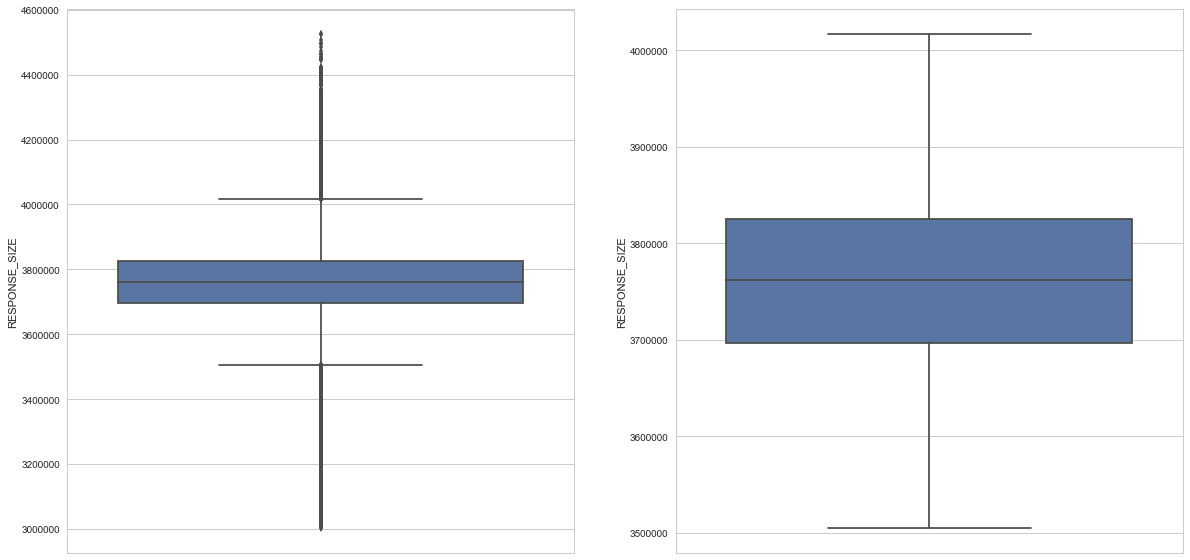

In [101]:
fig,axarr = plt.subplots(1,2,figsize=(20,10))

sns.factorplot(y='RESPONSE_SIZE',data=train,kind='box',size=15,aspect=.4,showfliers=True,ax=axarr[0])
sns.factorplot(y='RESPONSE_SIZE',data=train,kind='box',size=15,aspect=.4,showfliers=False,ax=axarr[1])
plt.close(2)
plt.close(3)

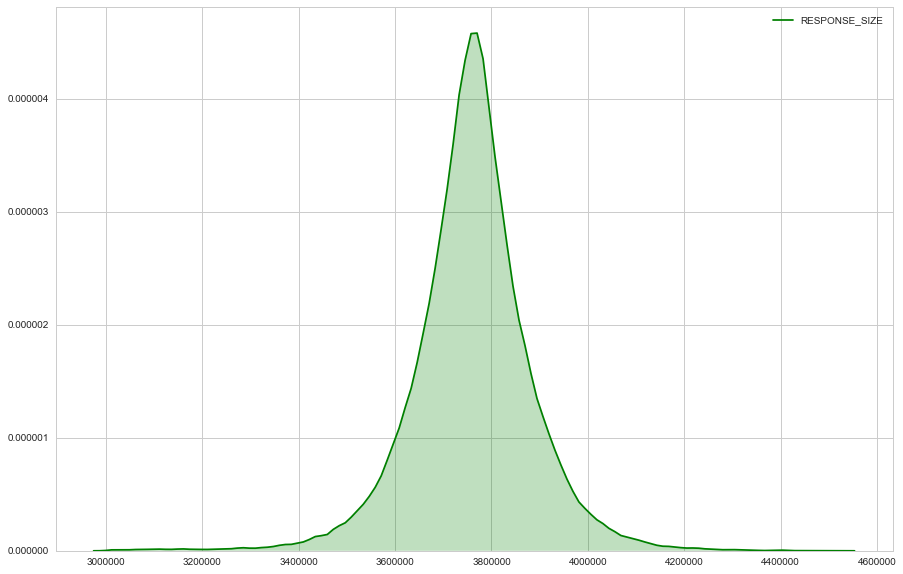

In [102]:
plt.figure(figsize=(15,10))
sns.kdeplot(train["RESPONSE_SIZE"][(train["TIME_TO_SERVER_MS"].notnull())], color="green", shade = True)

### CACHE_RESULT_CODE ###

In [99]:
train.CACHE_RESULT_CODE.value_counts(normalize=True)

TCP-MISS    0.838829
TCP-HIT     0.161171
Name: CACHE_RESULT_CODE, dtype: float64

### TIME_TO_SERVER_MS ###

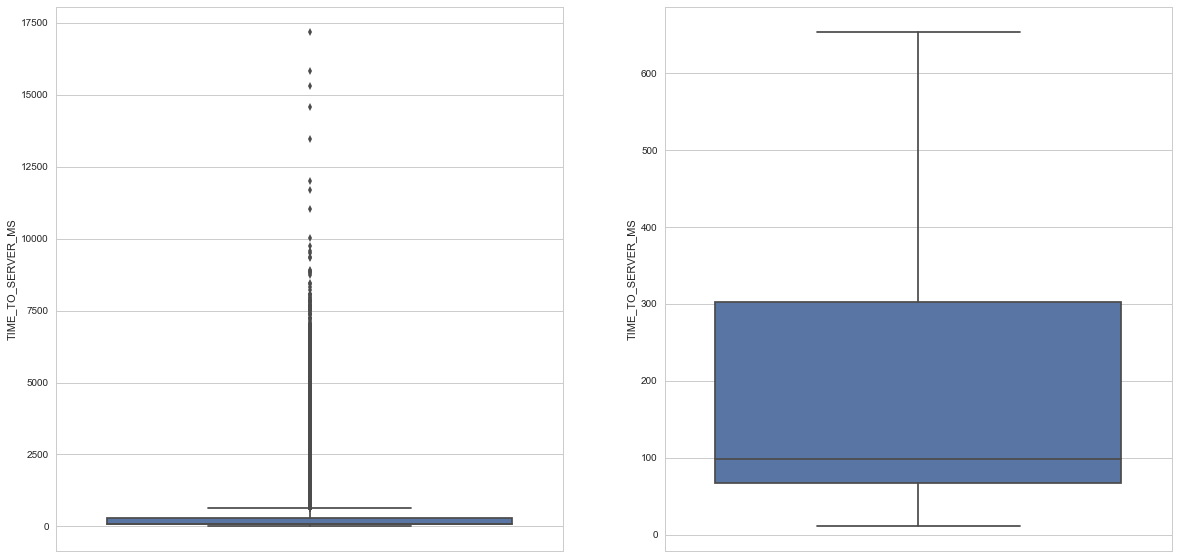

In [24]:
fig,axarr = plt.subplots(1,2,figsize=(20,10))

sns.factorplot(y='TIME_TO_SERVER_MS',data=train,kind='box',size=15,aspect=.4,showfliers=True,ax=axarr[0])
sns.factorplot(y='TIME_TO_SERVER_MS',data=train,kind='box',size=15,aspect=.4,showfliers=False,ax=axarr[1])
plt.close(2)
plt.close(3)

The first plot shows the distribution with outliers while the second is free from outliers 

The box plot for the TIME_TO_SERVER_MS column shows that there were certainly considerable number of packets which took more than the rest to be served 

In [26]:
train.TIME_TO_SERVER_MS.describe()

count    145891.000000
mean        271.367692
std         506.587025
min          11.000000
25%          67.000000
50%          98.000000
75%         302.000000
max       17189.000000
Name: TIME_TO_SERVER_MS, dtype: float64

Due to the outlier the mean is getting skewed towards the right while the median is not impaceted.

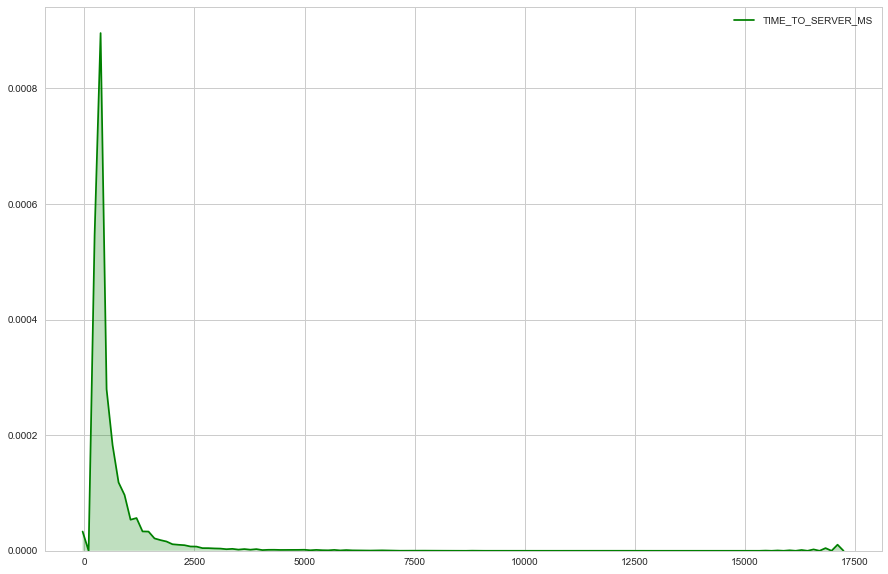

In [29]:
plt.figure(figsize=(15,10))
sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["TIME_TO_SERVER_MS"].notnull())], color="green", shade = True)

#### Misiing value imputation ####

Mising value imputation would be done considering the user session and packet size 

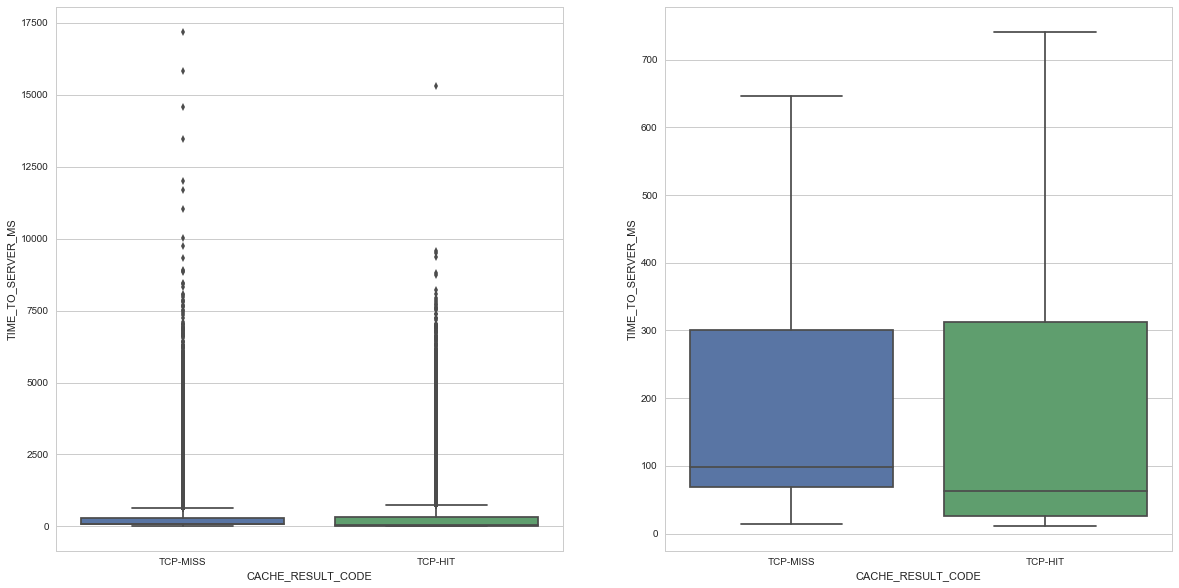

In [64]:
fig,axarr = plt.subplots(1,2,figsize=(20,10))

sns.factorplot(y='TIME_TO_SERVER_MS',x='CACHE_RESULT_CODE',data=train,kind='box',size=15,aspect=.4,showfliers=True,ax=axarr[0])
sns.factorplot(y='TIME_TO_SERVER_MS',x='CACHE_RESULT_CODE',data=train,kind='box',size=15,aspect=.4,showfliers=False,ax=axarr[1])
plt.close(2)
plt.close(3)